# Multi Pitch Sport Routes 5.7 to 5.10b

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
climbing = pd.read_csv('data/sport2.csv')

In [73]:
climbing.shape

(708, 20)

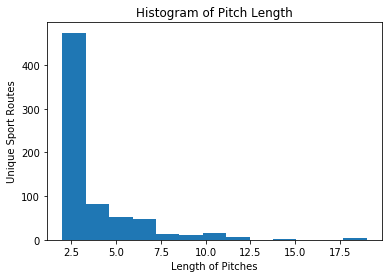

In [74]:
sport.Pitches.plot(kind='hist', bins=13)
plt.ylabel('Unique Sport Routes')
plt.xlabel('Length of Pitches')
plt.title('Histogram of Pitch Length');

### Most multi pitches in the world are 2 or 3 pitches!!!

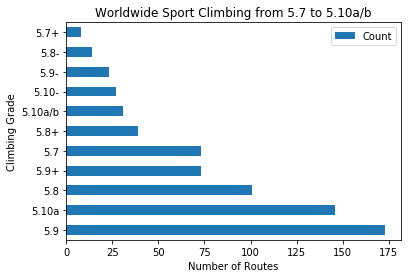

In [69]:
climbing_class = pd.DataFrame(climbing['Class'].value_counts(ascending=False))
climbing_class.index.name = 'Class Rating'
climbing_class.columns=['Count']
climbing_class.sort_values('Count', ascending=False, inplace=True)
climbing_class.plot(kind='barh')
plt.ylabel('Climbing Grade')
plt.xlabel('Number of Routes')
plt.title('Worldwide Sport Climbing from 5.7 to 5.10a/b');

In [57]:
cols = list(climbing.columns.values)
sport = climbing[[cols[0]]  +  cols[2:20] + [cols[1]] ]
sport.sort_values('Pitches', ascending = False).head(10)

,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
102,Moonwalker,4.0,19,3500.0,1067.0,-18.36256,-41.33499,Pedra Riscada,Minas Gerais,NaN,Brazil,South America,International,Sport,NaN,NaN,5.10a,PG13,NaN,https://www.mountainproject.com/route/11618110...
357,The Goat,3.2,19,2100.0,640.0,50.85270,-121.70470,Marble Canyon,Interior Plateau,NaN,Canada,North America,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11514586...
325,Flyboys,3.1,18,1800.0,549.0,48.62285,-120.44865,Goat Wall,Mazama,Washington,USA,North America,Domestic,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11366537...
24,L'arete a Marion,4.0,14,1600.0,488.0,45.87235,6.46474,Col des Aravis,Northern Alps,NaN,France,Europe,International,Sport,NaN,NaN,5.7+,NaN,NaN,https://www.mountainproject.com/route/11350040...
135,Berbertraum,3.0,14,750.0,229.0,31.58413,-5.59164,Mansour gauche,Todra Gorge,NaN,Morocco,Africa,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11818702...
604,Une arête dans la gorge,3.3,12,1800.0,549.0,31.58845,-5.59553,Arrete nord,Todra Gorge,NaN,Morocco,Africa,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11214078...
257,Sperone 6a,3.0,12,1200.0,366.0,46.18840,8.76010,Sperone,Ponte Brolla,NaN,Switzerland,Europe,International,Sport,NaN,NaN,5.10a,NaN,NaN,https://www.mountainproject.com/route/10772014...
165,Naebel und Chempae 6a,4.0,12,1200.0,366.0,46.68270,8.18070,Engelhoerner,Switzerland,NaN,Switzerland,Europe,International,Sport,NaN,NaN,5.10a,NaN,NaN,https://www.mountainproject.com/route/10741723...
680,Steinadlerroute,4.0,12,1400.0,427.0,46.34470,7.86177,Wiwanni,Switzerland,NaN,Switzerland,Europe,International,Sport,NaN,NaN,5.7,NaN,NaN,https://www.mountainproject.com/route/11513051...
85,Blue Line,3.3,12,1000.0,305.0,36.90850,-4.76030,Suiza,Escalera Arabe,NaN,Spain,Europe,International,Sport,NaN,NaN,5.9-,NaN,NaN,https://www.mountainproject.com/route/11813481...


### Brazil and Morroco have 3 of the longest multi pitch sport routes in the world!

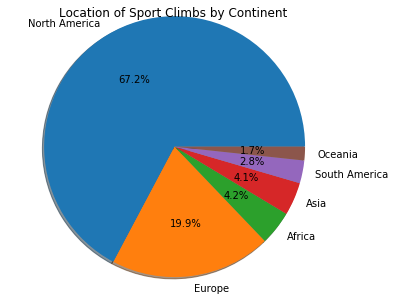

In [58]:
exp_vals = [476,141,30,29,20,12]
exp_labels = ['North America', 'Europe', 'Africa', 'Asia', 'South America', 'Oceania']
plt.axis('equal')
plt.pie(exp_vals, labels=exp_labels, radius = 1.5, autopct = '%0.1f%%', shadow = True)
plt.title('Location of Sport Climbs by Continent \n');

### Even though Brazil or Morroco have 3 of the longest top multi pitch sport routes in the world, compared to the overall number of sport routes in the world, these countries are a tiny percentage. This means these countries are best for targeted climbing expeditions. It is definetely worth going to these locations!

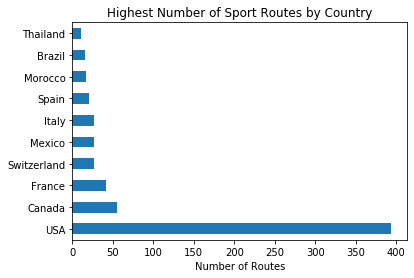

In [59]:
sport['Loc_4'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Number of Routes')
plt.title('Highest Number of Sport Routes by Country');

### USA has by far the most number of Sport Routes!

## USA Analysis

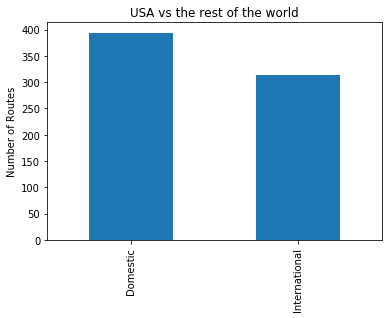

In [60]:
climbing['Loc_6'].value_counts().head(15).plot(kind='bar')
plt.ylabel('Number of Routes')
plt.title('USA vs the rest of the world');

### Sport climbing started in the late 80's (before that it was Trad). This data strongly suggests that Sport climbing  started in the USA!!!

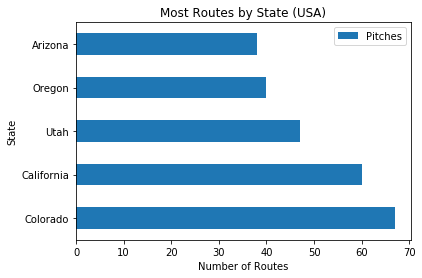

In [75]:
climbing[['Loc_3', 'Pitches']].groupby('Loc_3').count().sort_values('Pitches', ascending=False).head(5).plot(kind='barh');
plt.ylabel('State')
plt.xlabel('Number of Routes')
plt.title('Most Routes by State (USA)');

### Not only did Sport climbing probably start in the USA, it most likely started in Colorado or California!

In [62]:
protection = pd.DataFrame(climbing['Protection_Rating'].value_counts())
protection.index.name = "Rating"
protection

,Protection_Rating
Rating,
PG13,50
R,11
X,1


### Some Routes more dangerous than the rest! PG13, R, and X (Hurt, Seriously Hurt, Killed)

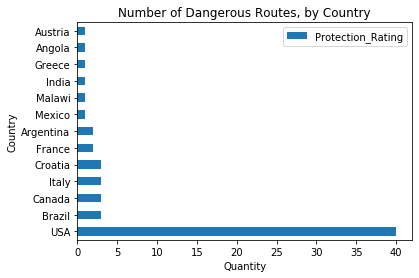

In [63]:
climbing[['Protection_Rating', 'Loc_4']].groupby('Loc_4').count().\
sort_values(by='Protection_Rating', ascending = False).head(13).plot(kind='barh');
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.title('Number of Dangerous Routes, by Country');

### Americans are bold and adventurous - or crazy, depending on how you see it!

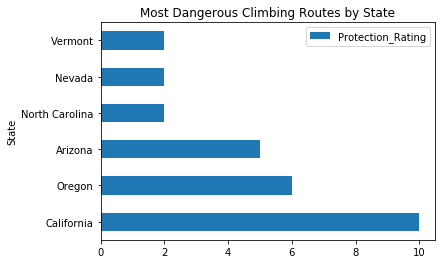

In [64]:
climbing[['Protection_Rating', 'Loc_3']].groupby('Loc_3').count()\
.sort_values(by='Protection_Rating', ascending = False).head(6).plot(kind='barh')
plt.ylabel('State')
plt.title('Most Dangerous Climbing Routes by State');

### Colorado is not on this list! Even though it has the highest number of sport routes! Wow! 
### It is definitely worth taking a trip to Colorado! Not only does it have a huge amount of climbing, 
### they have the safest protection rating.
### A trip to California is surely a must do, but extra precaution should be taken!

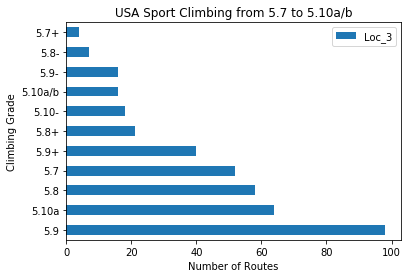

In [65]:
usa = climbing[['Loc_3', 'Class']].groupby('Class').count().sort_values('Loc_3', ascending=False).plot(kind='barh')
plt.ylabel('Climbing Grade')
plt.xlabel('Number of Routes')
plt.title('USA Sport Climbing from 5.7 to 5.10a/b');

## Star Ratings

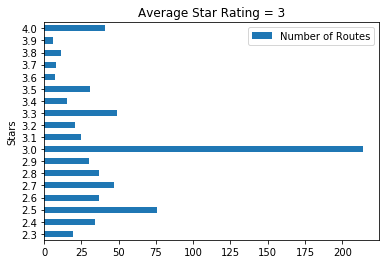

In [66]:
stars = pd.DataFrame(climbing['Avg_Stars'].value_counts())
stars.index.name = 'Stars'
stars.columns=['Number of Routes']
stars.sort_values('Stars', ascending=True, inplace=True)
stars.plot(kind='barh')
plt.title('Average Star Rating = 3');

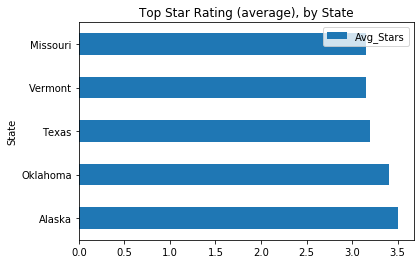

In [67]:
climbing[['Avg_Stars', 'Loc_3']].groupby('Loc_3').mean()\
.sort_values(by='Avg_Stars', ascending = False).head(5).plot(kind='barh')
plt.ylabel('State')
plt.title('Top Star Rating (average), by State');

### Misleading Graph - See below!

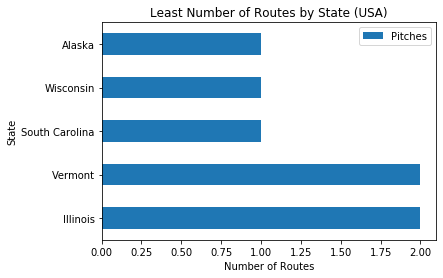

In [83]:
climbing[['Loc_3', 'Pitches']].groupby('Loc_3').count().sort_values('Pitches', ascending=False).tail(5).plot(kind='barh');
plt.ylabel('State')
plt.xlabel('Number of Routes')
plt.title('Least Number of Routes by State (USA)');

### Do not visit these locations. There are only 2 or less sport climbs!
### Definetely do no vist Vermont because there only have two climbs, and of those two climbs, they both have a ## Protection Rating of injury, serious injury, or death. Pass!

In [ ]:
## Summary and Findings: Places to vist: Brazil, Morocco, Colorado, California
## Brazil and Morocco are targeted expeditions, while Colorado and Califonia are 'just show up and you have tons of routes!'
## USA dominates the sport route world
## Places not to visit: Vermont, Illnois, South Carolina, Wisconcon, Alaska
## Sport climbing mostly likely started in CA or CO